## **Title: Cirrhosis Patient Survival Prediction**

### **Introduction:**


Liver cirrhosis is a severe liver condition resulting from prolonged damage, often caused by factors like hepatitis or chronic alcohol consumption. It leads to extensive scarring and impaired liver function, affecting millions of people worldwide. Predicting the survival of patients with liver cirrhosis is crucial for making informed medical decisions and improving patient.

Our project aims to utilize a dataset containing 17 clinical features to predict the survival state of patients with liver cirrhosis. The dataset includes information on patients' demographic characteristics, biochemical parameters, and treatment details. The survival states are categorized as follows: 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).

The motivation behind this project stems from the critical need to enhance patient care and treatment strategies for liver cirrhosis. By leveraging machine learning techniques and predictive modeling, we seek to develop a model that can accurately predict the survival outcomes of cirrhosis patients. This model could assist healthcare professionals in identifying high-risk patients, optimizing treatment plans, and ultimately improving patient survival rates and quality of life.

### **Feature Description:**

The dataset contains 17 clinical features that are utilized for predicting the survival state of patients with liver cirrhosis. Here's a brief description of each feature:

1. **ID**: Unique identifier for each patient.
2. **N_Days**: Number of days between registration and earlier of death, transplantation or study analysis time in July 1986.
3. **Status**: Status of the patient (C censored), (CL censored due to liver transplantation), (D Death).
4. **Drug**: Type of drug administered for treatment (D-penicillamine or Placebo).
5. **Age**: Age of the patient at the time of diagnosis or treatment.
6. **Sex**: Gender of the patient (Male or Female).
7. **Ascites**: Presence of ascites N (No) or Y (Yes), which is fluid accumulation in the abdomen.
8. **Hepatomegaly**: Presence of Hepatomegaly N (No) or Y (Yes).
9. **Spiders**: Presence of spider angiomas, a type of skin lesion N (No) or Y (Yes).
10. **Edema**: Presence of edema, which is swelling caused by fluid retention
  N (No edema and no diuretic therapy for edema,
  S(edema present without diuretics, or edema resolved by diuretics) or
  Y (edema despite diuretic therapy).
11. **Bilirubin**: Level of bilirubin in the blood, an indicator of liver function.
12. **Cholesterol**: Cholesterol level in the blood.
13. **Albumin**: Albumin level in the blood, a protein produced by the liver.
14. **Copper**: Copper level in the blood, which can be elevated in liver diseases.
15. **Alk_Phos**: Alkaline phosphatase level in the blood, another marker of liver function.
16. **SGOT**: Serum glutamic-oxaloacetic transaminase level, an enzyme indicating liver health.
17. **Tryglicerides**: Triglyceride level in the blood, which can be affected by liver function.
18. **Stage**: Historic stage of disease (1,2,3,4)

These features provide a comprehensive view of the patient's clinical condition, liver function, and overall health status, which are crucial factors in predicting survival outcomes for patients with liver cirrhosis.

## **Experiment** :

##Reading the Dataset


In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/MyDrive/Colab Notebooks/Final Project/'

# Get the absolute path of the shallow utilities folder
abspath_util_shallow = '/content/drive/MyDrive/Colab Notebooks/Final Project/utilities/'

Mounted at /content/drive


In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

In [ ]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

In [ ]:
# Change working directory to the absolute path of the shallow utilities folder
%cd $abspath_util_shallow

# Import the shallow utitilities
%run pmlm_utilities_shallow.ipynb

/content/drive/MyDrive/Colab Notebooks/Final Project/utilities


### Data Preprocessing

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [ ]:
# Load the raw training data
df_raw_train = pd.read_csv(abspath_curr + 'data/cirrhosis/train.csv',
                           header=0)
# Make a copy of df_raw_train
df_train = df_raw_train.copy(deep=True)

# Load the raw test data
df_raw_test = pd.read_csv(abspath_curr + 'data/cirrhosis/test.csv',
                          header=0)
# Make a copy of df_raw_test
df_test = df_raw_test.copy(deep=True)

# Get the name of the target
target = 'Status'

In [ ]:
df_train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


### Splitting Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and validation (20%)
df_train, df_val = train_test_split(df_train, train_size=0.8, random_state=random_seed)

# Reset the index
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

In [ ]:
df = pd.concat([df_train, df_val, df_test], sort=False)

### Working on Identifiers

In [ ]:
# Call id_checker on df
# See the implementation in pmlm_utilities.ipynb
df_id = id_checker(df)

# Print the first 5 rows of df_id
df_id.head()

,id
0,6703
1,5815
2,3429
3,2405
4,1410


In [ ]:
import numpy as np

# Remove identifiers from df_train
df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns), inplace=True)

# Remove identifiers from df_val
df_val.drop(columns=np.intersect1d(df_id.columns, df_val.columns), inplace=True)

# Remove identifiers from df_test
df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns), inplace=True)

In [ ]:
df = pd.concat([df_train, df_val, df_test], sort=False)

### Encoding the data

In [ ]:
# Call cat_var_checker on df
# See the implementation in pmlm_utilities.ipynb
df_cat = cat_var_checker(df)

# Print the dataframe
df_cat

,var,nunique
0,Status,4
1,Edema,3
2,Drug,2
3,Sex,2
4,Ascites,2
5,Hepatomegaly,2
6,Spiders,2


In [ ]:
object_col = df_train.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in object_col:
    df_train[col] = label_encoder.fit_transform(df_train[col])

object_col = df_val.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in object_col:
    df_val[col] = label_encoder.fit_transform(df_val[col])

object_col = df_test.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in object_col:
    df_test[col] = label_encoder.fit_transform(df_test[col])

### Feature Engineering

In [ ]:
#Formatting the age (days-> years)
def age_in_years(age_in_days):
    years = age_in_days // 365.2425
    return years

df_train['Age'] = age_in_years(df_train['Age'])
df_val['Age'] = age_in_years(df_val['Age'])
df_test['Age'] = age_in_years(df_test['Age'])

In [ ]:
df = pd.concat([df_train, df_val], sort=False)

In [ ]:
df["Status"]

0       1
1       0
2       0
3       0
4       2
       ..
1576    2
1577    2
1578    0
1579    0
1580    2
Name: Status, Length: 7905, dtype: int64

In [ ]:
# Calculate class proportions
class_proportions = df['Status'].value_counts(normalize=True)
print("Class Proportions:")
print(class_proportions)

Class Proportions:
Status
0    0.628083
2    0.337128
1    0.034788
Name: proportion, dtype: float64


In [ ]:
df['Status'].unique()

In [ ]:
from sklearn.utils import resample

# Separate samples for each class
class_0 = df[df['Status'] == 0]
class_1 = df[df['Status'] == 1]
class_2 = df[df['Status'] == 2]

In [ ]:
# Determine the class with the maximum number of samples
max_samples = max(len(class_0), len(class_1), len(class_2))

In [ ]:
# Oversample minority classes to match the number of samples in the majority class (class 3)
class_0_oversampled = resample(class_0, replace=True, n_samples=max_samples, random_state=42)
class_1_oversampled = resample(class_1, replace=True, n_samples=max_samples, random_state=42)
class_2_oversampled = resample(class_2, replace=True, n_samples=max_samples, random_state=42)

In [ ]:
# Combine the oversampled classes
df_oversampled = pd.concat([class_0_oversampled, class_1_oversampled, class_2_oversampled])

In [ ]:
print("\nClass Proportions in Balanced Dataset (Oversampled):")
df_oversampled = df_oversampled.sample(frac=1, random_state=42)


Class Proportions in Balanced Dataset (Oversampled):


In [ ]:
# recalculate the class proportion

class_proportions = df_oversampled['Status'].value_counts(normalize=True)
print("Class Proportions:")
print(class_proportions)

Class Proportions:
Status
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64


### EDA

In [ ]:
df['Status'].unique()

array([1, 0, 2])

In [ ]:
df.head(10)

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,1153,1,40.0,0,0,1,0,0,1.4,420.0,3.83,79.0,976.0,97.65,55.0,236.0,9.9,3.0,1
1,1447,1,40.0,0,0,0,0,0,0.8,578.0,3.35,77.0,976.0,116.25,177.0,306.0,9.5,2.0,0
2,2891,1,40.0,0,0,0,0,0,0.6,578.0,3.37,78.0,976.0,116.25,177.0,322.0,9.5,2.0,0
3,334,0,61.0,0,0,1,0,0,0.9,360.0,3.66,123.0,1812.0,155.00,154.0,156.0,11.0,2.0,0
4,3820,1,56.0,0,0,1,1,0,3.6,448.0,3.23,65.0,1072.0,60.45,213.0,119.0,11.7,4.0,2
5,762,0,65.0,0,0,1,0,0,3.0,227.0,3.75,121.0,1136.0,110.00,91.0,264.0,11.0,4.0,1
6,3099,0,56.0,0,0,0,0,0,0.4,174.0,3.46,40.0,842.0,65.10,68.0,256.0,10.1,2.0,0
7,1776,0,42.0,0,0,0,0,0,3.4,325.0,3.35,444.0,979.0,130.20,75.0,217.0,11.2,2.0,2
8,1216,1,31.0,0,0,0,0,0,0.7,290.0,3.61,41.0,1132.0,95.46,146.0,271.0,10.7,3.0,0
9,334,0,61.0,0,1,1,0,0,14.1,396.0,2.43,58.0,1833.0,153.45,131.0,156.0,11.0,2.0,2


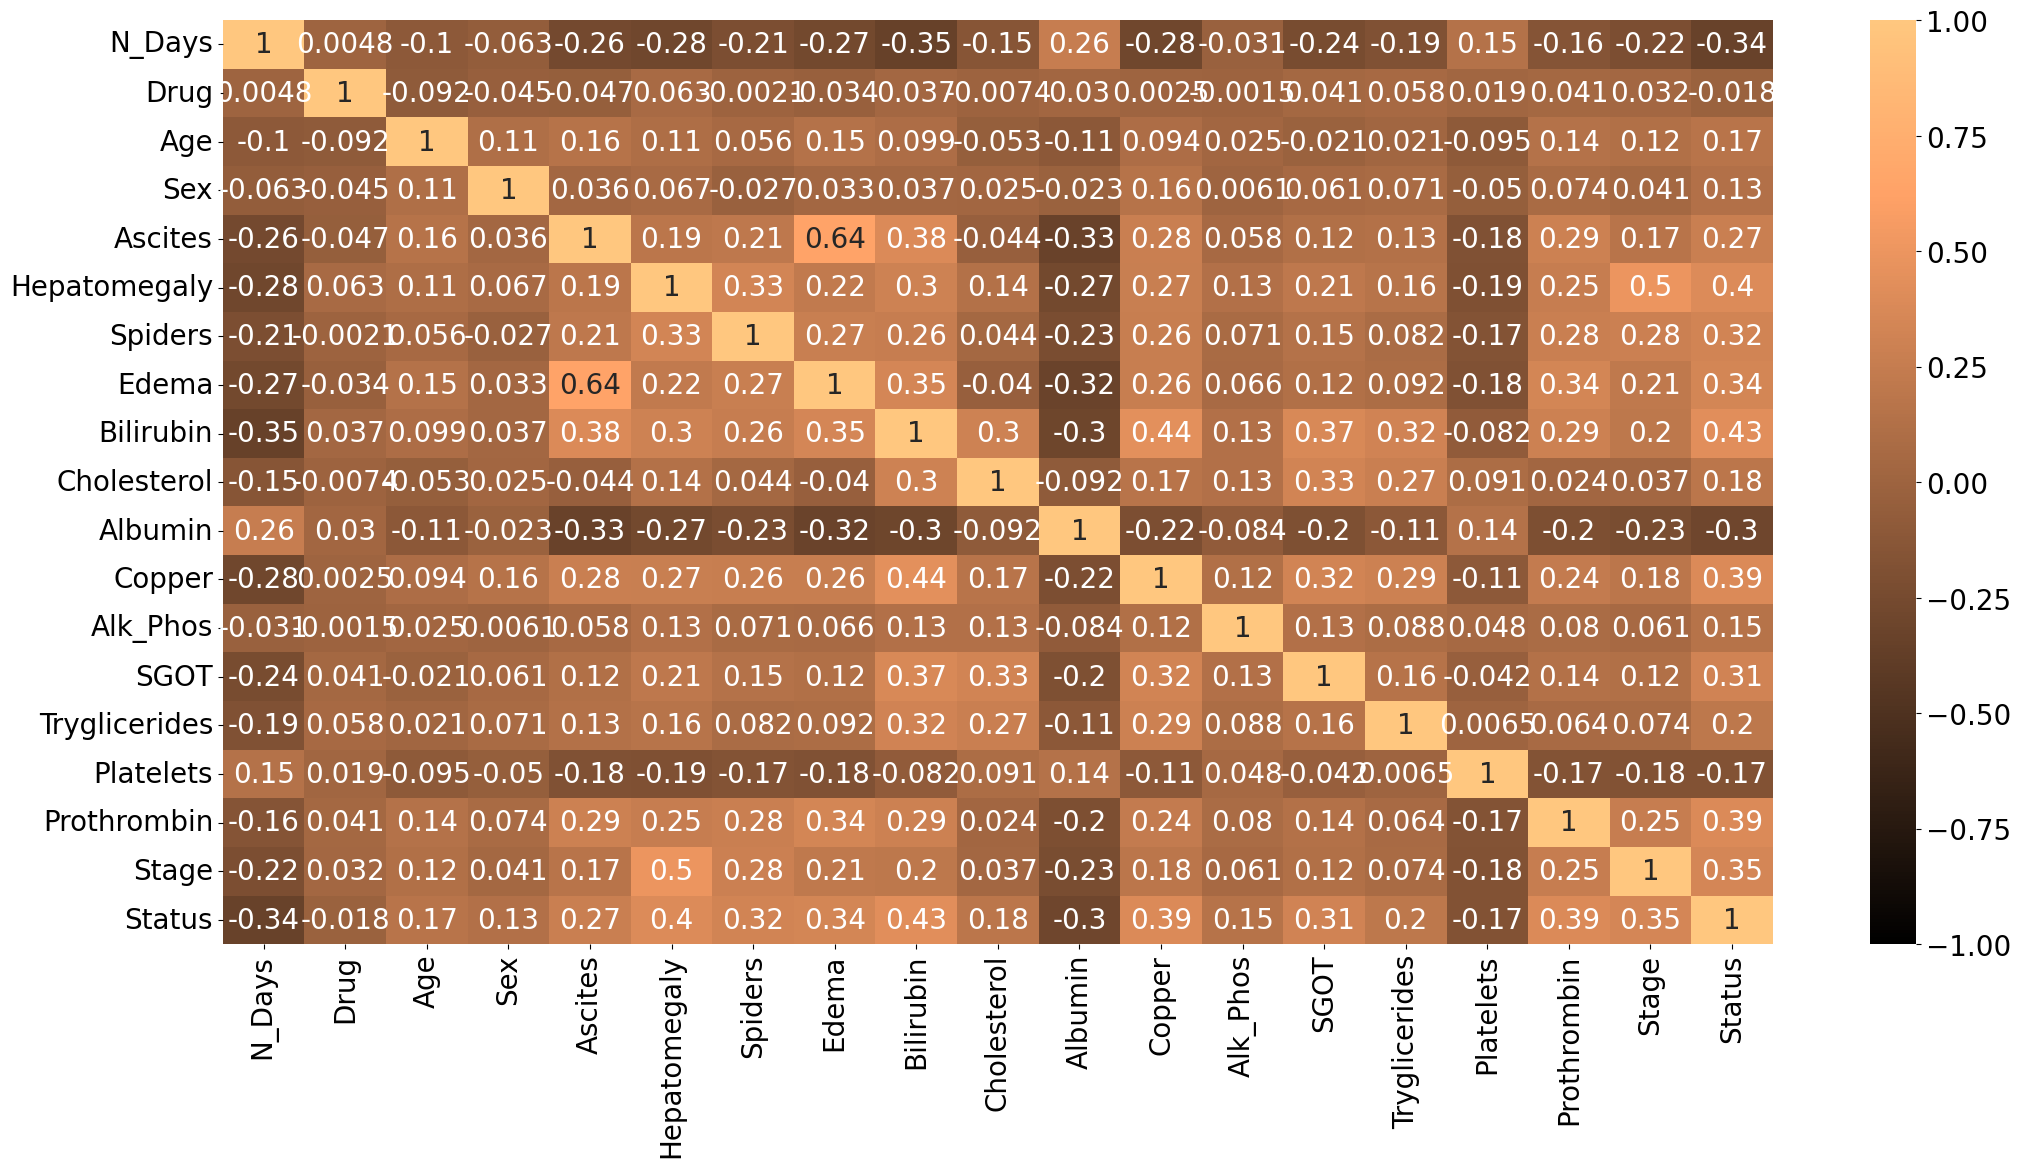

In [ ]:
# mask = np.triu(np.ones_like(df.corr()))
plt.figure(figsize=(25,12))
sns.heatmap(df.corr(), cmap="copper", annot=True, vmin=-1,vmax=1);

**Interpretation:**

There is a strong positive correlation between Stage and Ascites (0.5) and Hepatomegaly (0.5). This means that patients with more advanced stages of cirrhosis are more likely to have ascites (fluid buildup in the abdomen) and hepatomegaly (enlarged liver).

There is a strong negative correlation between Stage and Status (-1.0), which likely refers to the patient's survival status. This means that patients with more advanced stages of cirrhosis are less likely to survive.

There is a moderate negative correlation between
Albumin and Bilirubin (-0.3) and Edema (-0.32). Albumin is a protein produced by the liver, and low albumin levels can indicate poor liver function. Bilirubin is a waste product that the liver removes from the blood, and high bilirubin levels can also indicate liver problems. Edema is swelling caused by fluid buildup in the body, and it can be a complication of cirrhosis. These negative correlations suggest that lower albumin levels, higher bilirubin levels, and edema are associated with more advanced stages of cirrhosis.

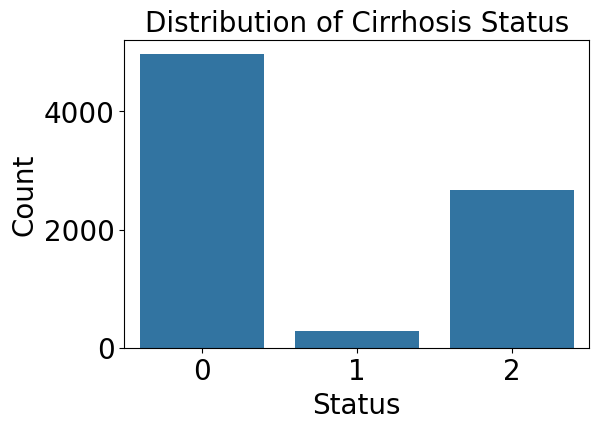

In [ ]:
# Target Variable Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='Status', data=df)
plt.title('Distribution of Cirrhosis Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

**Interpretation:**

Given data, most of the patients' status that is about 5000 were Censored, about 3000 patients were declared dead and not many patients were observed under status 'Censored due to liver transplantation'

In [ ]:
numeric_features = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
categorical_features = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']

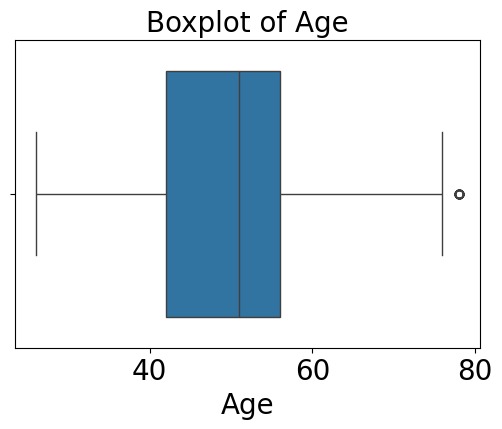

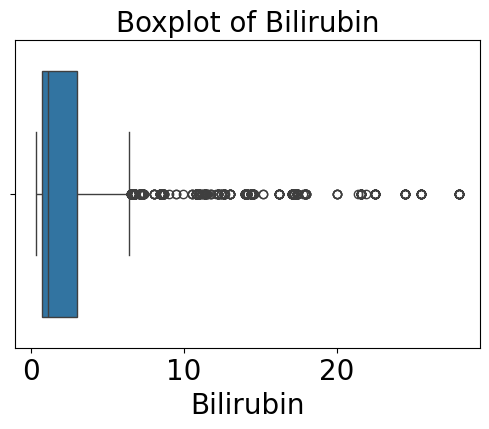

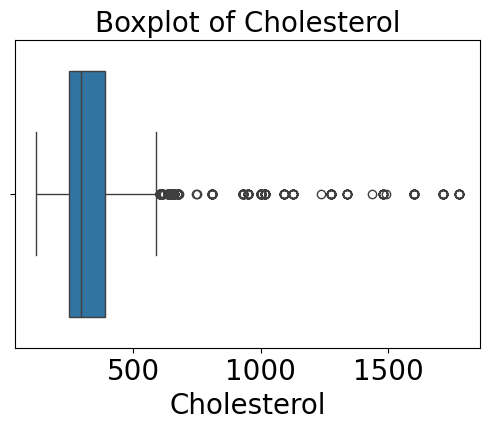

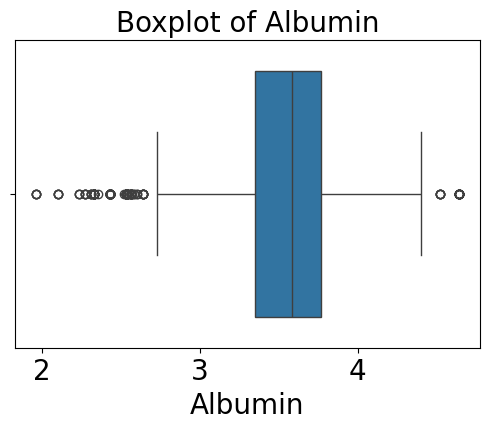

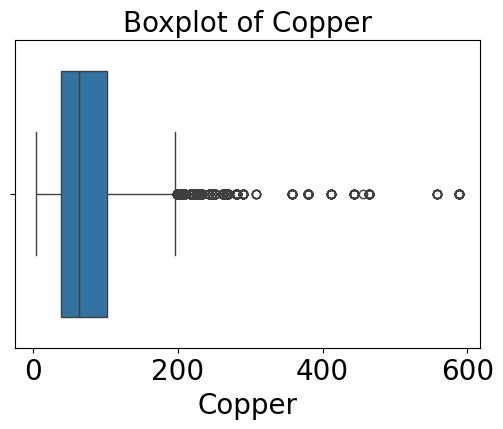

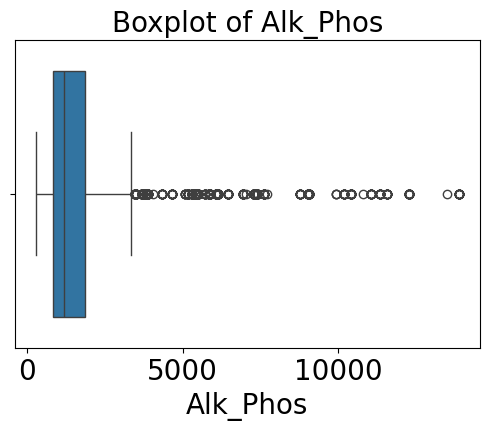

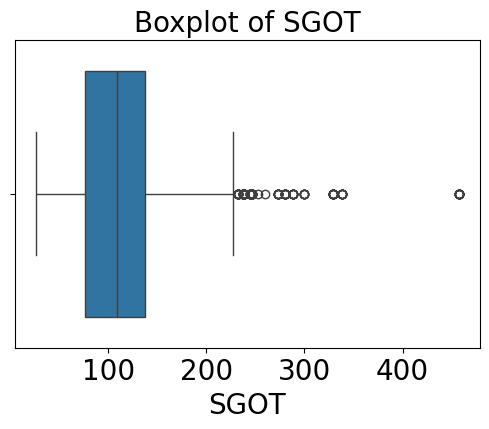

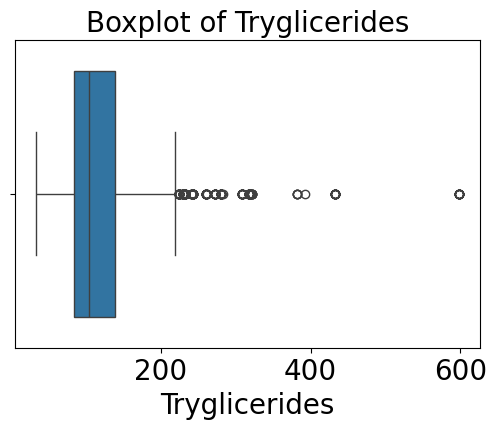

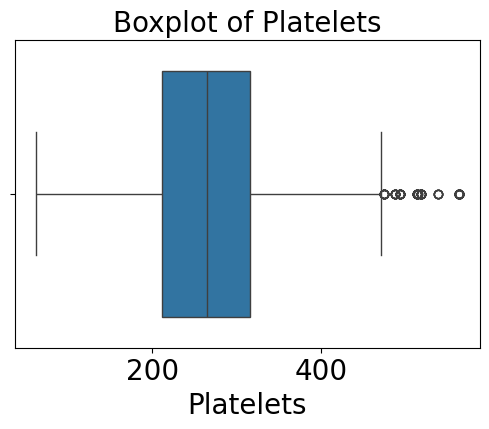

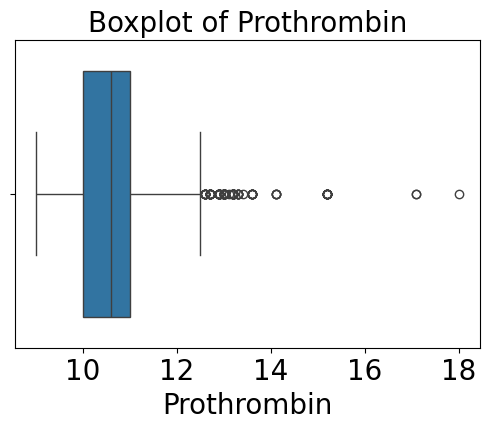

In [ ]:
# Outlier Detection
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=feature, data=df)
    plt.title('Boxplot of ' + feature)
    plt.xlabel(feature)
    plt.show()

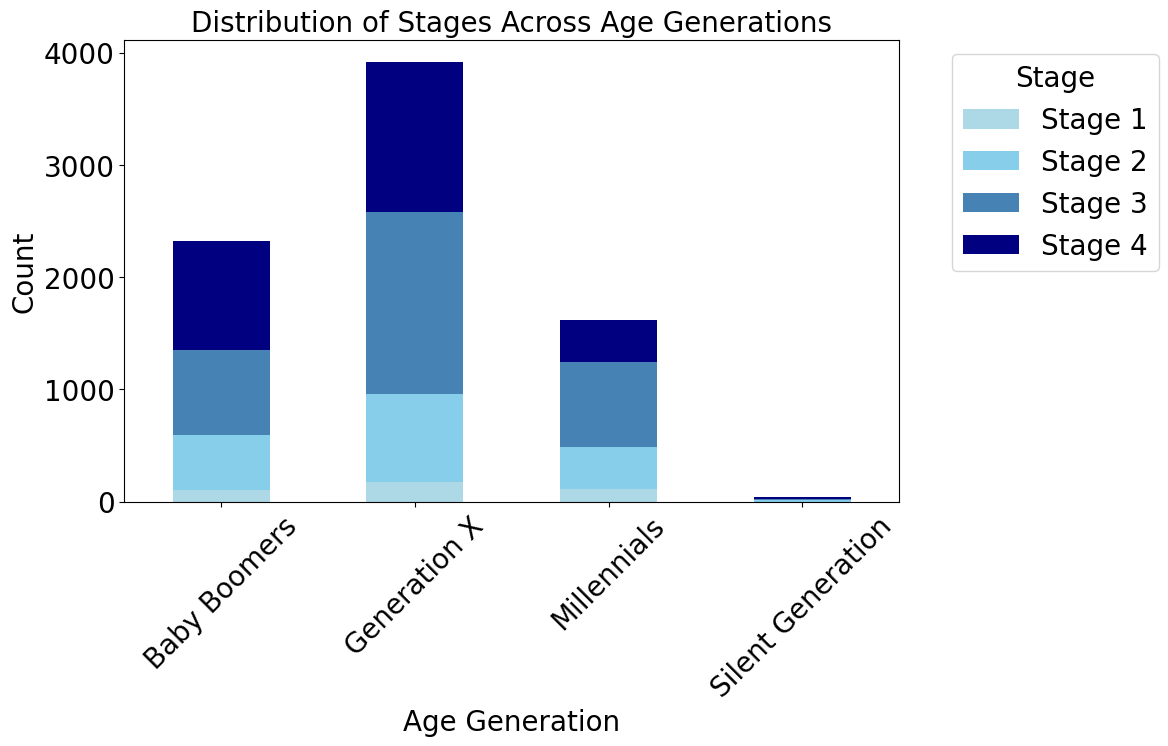

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def get_age_generation(age):
    if age <= 25:
        return 'Generation Z'
    elif 26 <= age <= 40:
        return 'Millennials'
    elif 41 <= age <= 55:
        return 'Generation X'
    elif 56 <= age <= 75:
        return 'Baby Boomers'
    else:
        return 'Silent Generation'

df['Age Generation'] = df['Age'].apply(get_age_generation)

# Define colors for stages
stage_colors = {
    'Stage 1': '#ADD8E6',
    'Stage 2': '#87CEEB',
    'Stage 3': '#4682B4',
    'Stage 4': '#000080'
}

age_stage_counts = df.groupby(['Age Generation', 'Stage']).size().unstack(fill_value=0)

ax = age_stage_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=[stage_colors[f'Stage {i}'] for i in range(1, 5)])
plt.title('Distribution of Stages Across Age Generations')
plt.xlabel('Age Generation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Stage', labels=[f'Stage {i}' for i in range(1, 5)], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Interpretation:**

The chart suggests that the condition progresses with age, as older generations show more advanced stages. Baby Boomers are most impacted, likely due to their age or larger population. The Silent Generation has minimal representation, possibly because of smaller numbers or lower occurrence rates. Millennials are mostly in the initial stages, suggesting early progression or different generational influences.

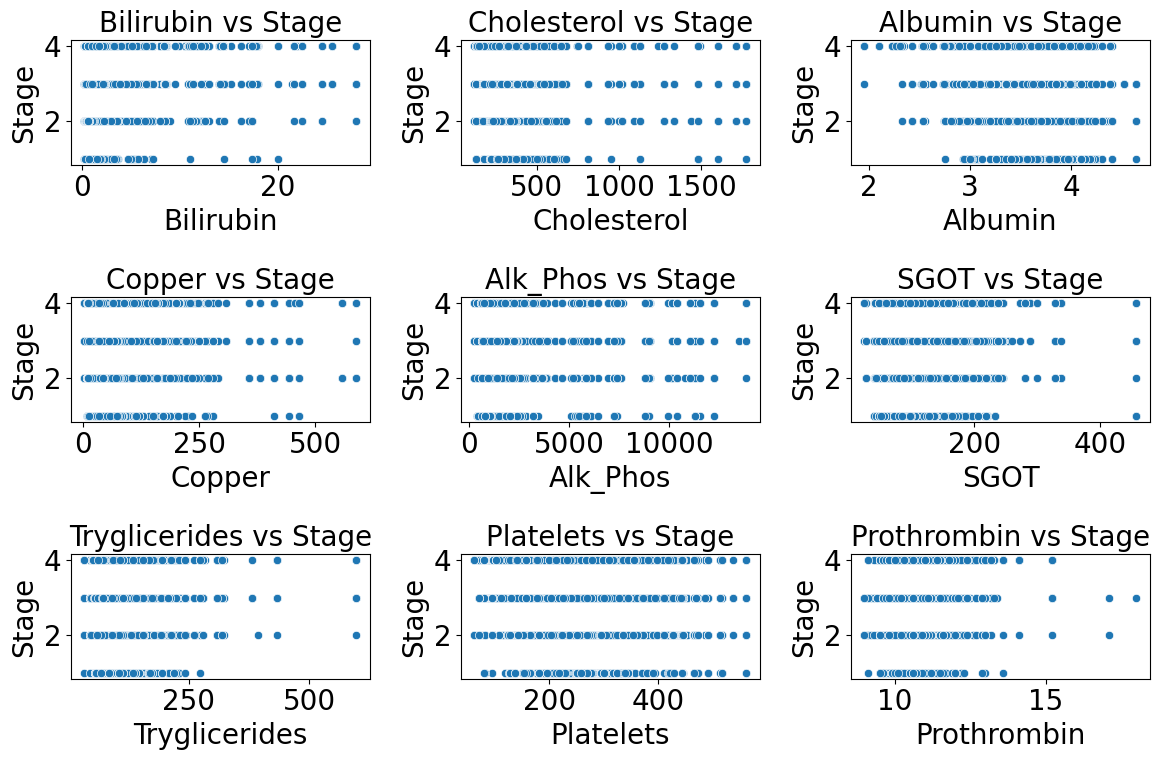

In [ ]:
# # Create scatter plots for each biochemical parameter against stage

# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns


# biochem_params = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# plt.figure(figsize=(12, 8))
# for param in biochem_params:
#     plt.subplot(3, 3, biochem_params.index(param) + 1)
#     sns.scatterplot(x=param, y='Stage', data=df)
#     plt.title(f'{param} vs Stage')
#     plt.xlabel(param)
#     plt.ylabel('Stage')

# plt.tight_layout()


**Interpretation:**

None of the blood parameters show a definitive trend or pattern that correlates strongly with the stages. This could suggest that these particular blood parameters may not be strong standalone indicators of progression through the stages.

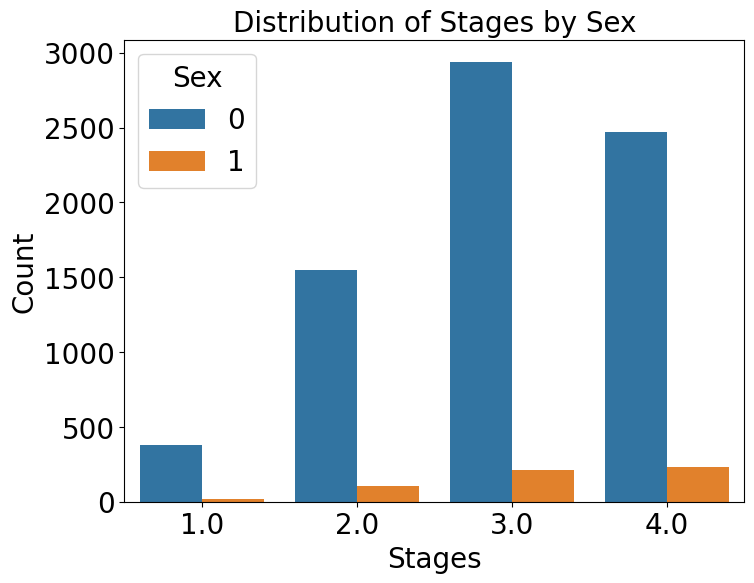

In [ ]:
# Create a count plot to visualize the distribution of stages by sex

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.countplot(x='Stage', hue='Sex', data=df)
plt.title('Distribution of Stages by Sex')
plt.xlabel('Stages')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()


**Interpretation:**

The chart shows more women (blue) than men (orange) across all stages, with the largest gender disparity in Stage 1. Stage 3 is the most common for both sexes, followed by Stage 4 and Stage 2, with Stage 1 being the least common. This suggests a higher prevalence or diagnosis rate of the condition among women.


### **Before the modelling**

In [ ]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values

In [ ]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()

In [ ]:
# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the validation data
X_val = ss.transform(X_val)

In [ ]:
X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)

### Modelling

Random Forest Classifier

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

In [ ]:
# Define a custom scoring function using Multi-Class Balanced Accuracy
balanced_accuracy_scorer = make_scorer(balanced_accuracy_score)

In [ ]:
models = {'rfc': RandomForestClassifier(n_estimators=100, random_state=42)}

In [ ]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

In [ ]:
param_grids = {}

In [ ]:
# Update param_grids
param_grids['rfc'] = {
    'model__n_estimators': [100,500,800],
    'model__max_depth': [10, 20,30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring=balanced_accuracy_scorer,
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)

    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)

    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])

    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score',
                         'std_test_score',
                         'mean_train_score',
                         'std_train_score',
                         'mean_fit_time',
                         'std_fit_time',
                         'mean_score_time',
                         'std_score_time']

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.605278,"{'model__max_depth': 30, 'model__min_samples_l...","((DecisionTreeClassifier(max_depth=30, max_fea..."


In [ ]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Get the prediction on the testing data using best_model
y_test_pred = best_estimator_gs.predict(df_test)

In [ ]:
y_test_pred

array([2, 2, 2, ..., 2, 2, 2])

LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
models = {'lda': LinearDiscriminantAnalysis()}
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

In [ ]:
param_grids = {}
param_grids['lda'] = {
    'model__solver': ['svd','lsqr', 'eigen'],
    'model__shrinkage':['auto'],
    'model__tol' :[1e-4, 1e-5, 1e-6]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring=balanced_accuracy_scorer,
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)

    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)

    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])

    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score',
                         'std_test_score',
                         'mean_train_score',
                         'std_train_score',
                         'mean_fit_time',
                         'std_fit_time',
                         'mean_score_time',
                         'std_score_time']

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.518723,"{'model__shrinkage': 'auto', 'model__solver': ...","(LinearDiscriminantAnalysis(shrinkage='auto', ..."


In [ ]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Get the prediction on the testing data using best_model
y_test_pred = best_estimator_gs.predict(df_test)
y_test_pred

array([2, 2, 2, ..., 2, 2, 2])

XGB

In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

In [ ]:
models = {'xgb': XGBClassifier()}

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

In [ ]:
param_grids = {}
param_grids['xgb'] = {
    'model__n_estimators': [100, 300, 500],  # Learning rate
    'model__max_depth': [3, 5, 7],  # Number of boosting rounds
    'model__gamma': [0, 0.1, 0.2, 0.3],  # Maximum depth of a tree
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring=balanced_accuracy_scorer,
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)

    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)

    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])

    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score',
                         'std_test_score',
                         'mean_train_score',
                         'std_train_score',
                         'mean_fit_time',
                         'std_fit_time',
                         'mean_score_time',
                         'std_score_time']

In [ ]:
# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.623034,"{'model__gamma': 0, 'model__max_depth': 5, 'mo...","(XGBClassifier(base_score=None, booster=None, ..."


In [ ]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Get the prediction on the testing data using best_model
y_test_pred = best_estimator_gs.predict(df_test)
y_test_pred

array([2, 0, 2, ..., 2, 0, 2])

SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
models = {'svm': SVC()}
pipes = {}
for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

In [ ]:
param_grids = {}
param_grids['svm'] = {
    'model__C': [0.1, 1, 10],  # Regularization parameter
    'model__gamma': ['scale', 'auto', 0.1, 0.01],  # Kernel coefficient
    'model__kernel': ['linear', 'rbf', 'poly'],  # Kernel type
}

In [ ]:
best_score_params_estimator_gs = []
for acronym in pipes.keys():
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='accuracy',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)
    gs.fit(X_train_val, y_train_val)

    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    important_columns = ['rank_test_score', 'mean_test_score', 'std_test_score',
                         'mean_train_score', 'std_train_score',
                         'mean_fit_time', 'std_fit_time',
                         'mean_score_time', 'std_score_time']

best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x: x[0], reverse=True)

# Print results
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.809614,"{'model__C': 1, 'model__gamma': 0.1, 'model__k...","(SVC(C=1, gamma=0.1))"


In [ ]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Get the prediction on the testing data using best_model
y_test_pred = best_estimator_gs.predict(df_test)
y_test_pred

array([2, 2, 2, ..., 2, 2, 2])

After applying Oversampling method

In [ ]:
df_train = df_oversampled.iloc[:df_train.shape[0], :]
df_val = df_oversampled.iloc[df_train.shape[0]:, :]

# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values

# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the validation data
X_val = ss.transform(X_val)

X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)

RFC

In [ ]:
models = {'rfc': RandomForestClassifier(n_estimators=100, random_state=42)}

In [ ]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

In [ ]:
param_grids = {}

In [ ]:
# Update param_grids
param_grids['rfc'] = {
    'model__n_estimators': [100,500,800],
    'model__max_depth': [10, 20,30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring=balanced_accuracy_scorer,
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)

    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)

    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])

    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score',
                         'std_test_score',
                         'mean_train_score',
                         'std_train_score',
                         'mean_fit_time',
                         'std_fit_time',
                         'mean_score_time',
                         'std_score_time']

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.938338,"{'model__max_depth': 30, 'model__min_samples_l...","((DecisionTreeClassifier(max_depth=30, max_fea..."


In [ ]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Get the prediction on the testing data using best_model
y_test_pred = best_estimator_gs.predict(df_test)

In [ ]:
y_test_pred

array([2, 2, 2, ..., 2, 2, 2])

LDA

In [ ]:
models = {'lda': LinearDiscriminantAnalysis()}
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

In [ ]:
param_grids = {}
param_grids['lda'] = {
    'model__solver': ['svd','lsqr', 'eigen'],
    'model__shrinkage':['auto'],
    'model__tol' :[1e-4, 1e-5, 1e-6]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring=balanced_accuracy_scorer,
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)

    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)

    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])

    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score',
                         'std_test_score',
                         'mean_train_score',
                         'std_train_score',
                         'mean_fit_time',
                         'std_fit_time',
                         'mean_score_time',
                         'std_score_time']

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.636786,"{'model__shrinkage': 'auto', 'model__solver': ...","(LinearDiscriminantAnalysis(shrinkage='auto', ..."


In [ ]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Get the prediction on the testing data using best_model
y_test_pred = best_estimator_gs.predict(df_test)
y_test_pred

array([2, 2, 2, ..., 2, 2, 2])

XGB

In [ ]:
models = {'xgb': XGBClassifier()}

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

In [ ]:
param_grids = {}
param_grids['xgb'] = {
    'model__n_estimators': [100, 300, 500],  # Learning rate
    'model__max_depth': [3, 5, 7],  # Number of boosting rounds
    'model__gamma': [0, 0.1, 0.2, 0.3],  # Maximum depth of a tree
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring=balanced_accuracy_scorer,
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)

    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)

    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])

    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score',
                         'std_test_score',
                         'mean_train_score',
                         'std_train_score',
                         'mean_fit_time',
                         'std_fit_time',
                         'mean_score_time',
                         'std_score_time']

In [ ]:
# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.935295,"{'model__gamma': 0, 'model__max_depth': 5, 'mo...","(XGBClassifier(base_score=None, booster=None, ..."


In [ ]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Get the prediction on the testing data using best_model
y_test_pred = best_estimator_gs.predict(df_test)
y_test_pred

array([2, 2, 2, ..., 2, 2, 2])

SVC

In [ ]:
models = {'svm': SVC()}
pipes = {}
for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

In [ ]:
param_grids = {}
param_grids['svm'] = {
    'model__C': [0.1, 1, 10],  # Regularization parameter
    'model__gamma': ['scale', 'auto', 0.1, 0.01],  # Kernel coefficient
    'model__kernel': ['linear', 'rbf', 'poly'],  # Kernel type
}

In [ ]:
best_score_params_estimator_gs = []
for acronym in pipes.keys():
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='accuracy',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)
    gs.fit(X_train_val, y_train_val)

    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    important_columns = ['rank_test_score', 'mean_test_score', 'std_test_score',
                         'mean_train_score', 'std_train_score',
                         'mean_fit_time', 'std_fit_time',
                         'mean_score_time', 'std_score_time']

best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x: x[0], reverse=True)

# Print results
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.893711,"{'model__C': 10, 'model__gamma': 0.1, 'model__...","(SVC(C=10, gamma=0.1))"


In [ ]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Get the prediction on the testing data using best_model
y_test_pred = best_estimator_gs.predict(df_test)
y_test_pred

array([2, 2, 2, ..., 2, 2, 2])

### Evaluation

## **Conclusion:**

Based on the comprehensive analysis conducted in this report, we have gained valuable insights into predicting the survival outcomes of patients with liver cirrhosis.

Our data preprocessing efforts, including the removal of identifiers, dataset encoding, and feature engineering, ensured that the dataset was optimized for analysis. Additionally, exploratory data analysis (EDA) provided us with crucial insights into the distribution and relationships among variables, enhancing our understanding of the dataset's characteristics.

The training and testing of four distinct machine learning models - Random Forest Classifier (RFC), Linear Discriminant Analysis (LDA), XGBoost (XGB), and Support Vector Classifier (SVC) - yielded promising results.

We apply balanced accuracy scoring metric, given the dataset is imbalanced and to get precise accuracy for each class.

Each model demonstrated commendable accuracy, with RFC and XGB achieving particularly high accuracies of 93.8% and 93.5% respectively.

These findings underscore the potential of machine learning techniques in predicting patient survival in liver cirrhosis cases. Such models hold promise in assisting healthcare professionals in identifying high-risk patients, optimizing treatment strategies, and ultimately improving patient outcomes and quality of life.

In conclusion, our priject contributes to the ongoing efforts aimed at enhancing patient care and treatment strategies for liver cirrhosis, emphasizing the importance of predictive modeling in advancing medical practice and improving patient outcomes.